In [4]:
import zeep
from datetime import datetime
import json
import pandas as pd

wsdl = './FachadaWSSGS.wsdl'
client = zeep.Client(wsdl=wsdl)


In [5]:
long_array_type = client.get_type('ns0:ArrayOfflong')
r = client.service.getValoresSeriesVO(long_array_type([7384]), '01/01/2000', '05/04/2021')

# s = str(r).replace("'", '"')\
#     .replace("None", '"None"')\
#         .replace("False", '"False"')\
#             .replace("True", '"True"')
# s = re.sub(r""""_value_1": Decimal\(\"(\d+)\"\)""", r""""_value_1": \1""", s)

In [6]:
a = zeep.helpers.serialize_object(r[0]['valores'])

In [7]:
a = pd.DataFrame(a)
a['valor'] = a['valor'].apply(lambda x: int(x['_value_1']))

In [8]:
a['date'] = a.apply(lambda x: datetime(x['ano'], x['mes'], x['dia']), axis = 1)
a = a.set_index('date')

<AxesSubplot:xlabel='date'>

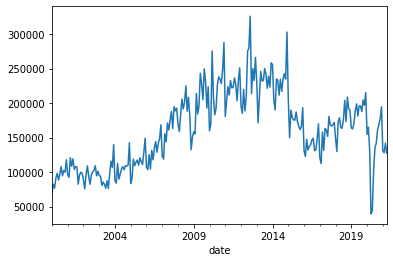

In [10]:
a['valor'].plot(kind='line')